In [1]:
### Module and data imports

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import os

cwd = os.getcwd()
print(cwd)

used_cars = pd.read_csv("tc20171021.csv")
us_cities_counties = pd.read_csv("uscitiesv1.4.csv")

### cleaning data (drop exotic vehicles)
max_car_price = 50000.0
used_cars.drop(used_cars[used_cars.Price >= max_car_price].index, inplace=True)

C:\Users\James\Dropbox\DS\TDI_Challenge


In [2]:
city_to_fips = {}
for i, row in us_cities_counties.iterrows():
    city_to_fips[row['city']] = str(row['county_fips']).zfill(5)
    
used_cars['Fips'] = used_cars.apply(lambda row: city_to_fips[row['City']] if city_to_fips.get(row['City']) else float('nan'), axis=1)
used_cars['Code'] = used_cars.apply(lambda row: row['State'].strip().upper(), axis=1)
print (used_cars.keys())

Index(['Id', 'Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make',
       'Model', 'Fips', 'Code'],
      dtype='object')


In [3]:
#### filter all NaN values
used_cars.dropna()

#### Calculating the average age of a car per county (Fips)
ave_car_year_by_county = used_cars.groupby(['Fips'])['Year'].mean()

fips = ave_car_year_by_county.index.values
ave_car_age = float(2019) - ave_car_year_by_county.values

#### Calculating the average age of a car per state
ave_car_year_by_state = used_cars.groupby(['Code'])['Year'].mean()
ave_car_age_st = float(2019) - ave_car_year_by_state.values

#### Calculating other averages
ave_car_price_by_state = used_cars.groupby(['Code'])['Price'].mean()
norm_car_price_by_state = ave_car_price_by_state/np.mean(ave_car_price_by_state)
ave_car_mil_by_state = used_cars.groupby(['Code'])['Mileage'].mean()
norm_car_mil_by_state = ave_car_mil_by_state/np.mean(ave_car_mil_by_state)

ave_car_mil_by_make = used_cars.groupby(['Make'])['Mileage'].mean()
ave_car_price_by_make = used_cars.groupby(['Make'])['Price'].mean()
ave_car_age_by_make = used_cars.groupby(['Make'])['Year'].mean()
ave_car_age_make = float(2019) - ave_car_age_by_make.values

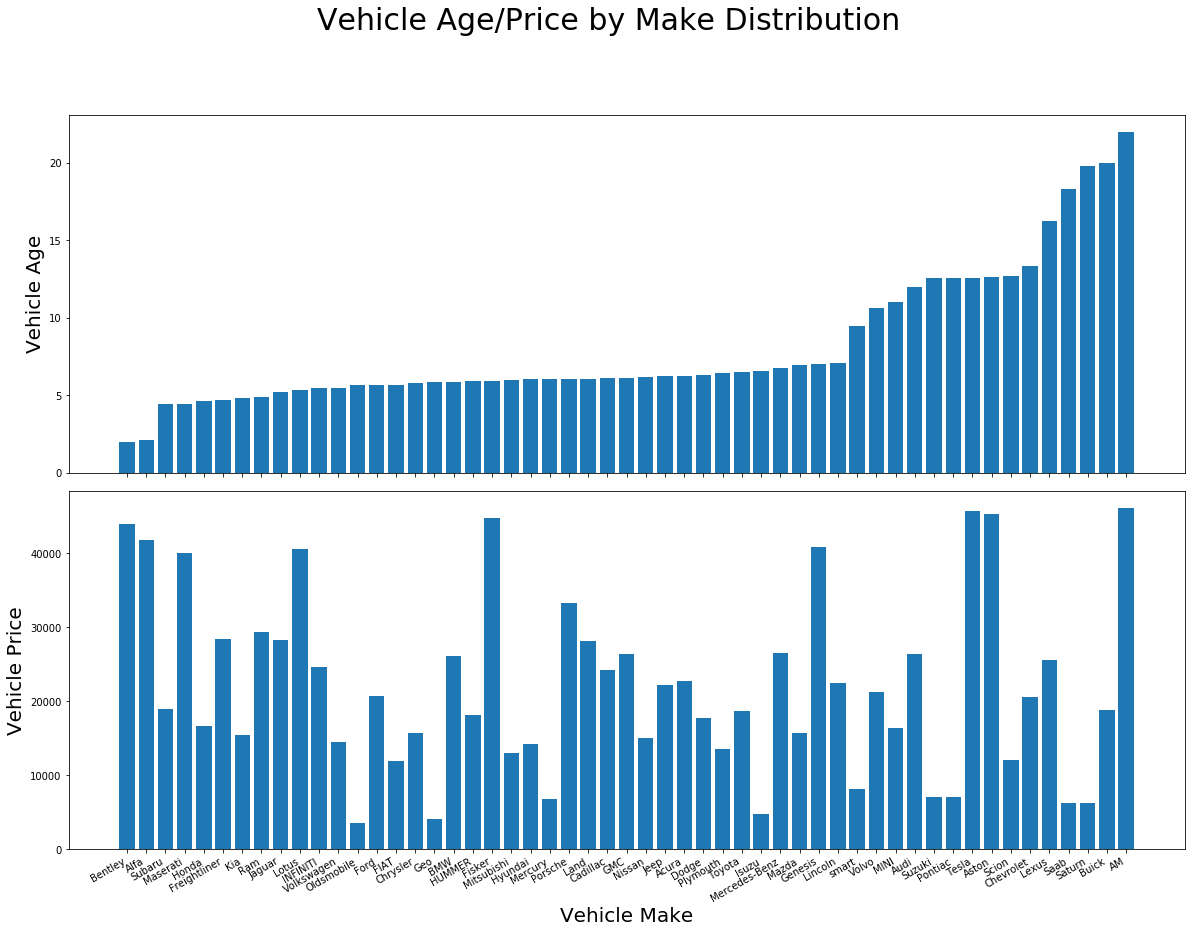

In [4]:
x = used_cars.Make.unique()
make_age = []
for make, age in zip(x.tolist(),ave_car_age_make.tolist()):
    make_age.append([make, age])
make_age_sorted = sorted(make_age, key=lambda x : x[1])

x = []
yage = []
for make, age in make_age_sorted:
    x.append(make)
    yage.append(age)

yprice = []
for make, age in make_age_sorted:
    yprice.append(ave_car_price_by_make[make])

f, axarr = plt.subplots(2, sharex=True, figsize=(20,15))
f.autofmt_xdate()
f.subplots_adjust(hspace=0.05)
f.suptitle('Vehicle Age/Price by Make Distribution', size=30)
axarr[0].bar(x, yage, width=0.8, align='center')
axarr[0].set_ylabel('Vehicle Age', size=20)
axarr[1].bar(x, yprice, width=0.8, align='center')
axarr[1].set_ylabel('Vehicle Price', size=20)
axarr[1].set_xlabel('Vehicle Make', size=20)

plt.savefig('common_labels.png', dpi=300)

f.savefig('vehicle_make_price_distribution.png', dpi=800)